In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sinfo import sinfo


sinfo()

-----
numpy     	1.16.4
pandas    	0.24.1
seaborn   	0.9.0
-----
IPython   	6.5.0
jupyter_client	5.2.3
jupyter_core	4.4.0
jupyterlab	0.35.6
notebook  	5.6.0
-----
Python 3.7.3 | packaged by conda-forge | (default, Mar 27 2019, 23:01:00) [GCC 7.3.0]
Linux-5.1.7-arch1-1-ARCH-x86_64-with-arch
4 logical CPU cores
-----
Session information updated at 2019-06-10 16:30


Pandas has options to control the dispalyed data frame output.

In [2]:
pd.describe_option('row')

display.latex.multirow : bool
    This specifies if the to_latex method of a Dataframe uses multirows
    to pretty-print MultiIndex rows.
    Valid values: False,True
    [default: False] [currently: False]

display.max_info_rows : int or None
    df.info() will usually show null-counts for each column.
    For large frames this can be quite slow. max_info_rows and max_info_cols
    limit this null check only to frames with smaller dimensions than
    specified.
    [default: 1690785] [currently: 1690785]

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, 

In [3]:
pd.set_option('display.max_rows', 9)

# Using apply

In [4]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


What does the `+` mean?

In [5]:
iris.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 14.3 KB


In [6]:
iris.memory_usage()

Index             80
sepal_length    1200
sepal_width     1200
petal_length    1200
petal_width     1200
species         1200
dtype: int64

In [7]:
iris.memory_usage(deep=True)

Index             80
sepal_length    1200
sepal_width     1200
petal_length    1200
petal_width     1200
species         9800
dtype: int64

Will get back to this when we talk abot categories

In [8]:
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [9]:
iris.agg('mean')

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [10]:
iris.agg(['mean', 'median'])

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.057333,3.758,1.199333
median,5.800000,3.000000,4.350,1.300000


If we want to use a function that is not available through pandas, we can use apply.

In [11]:
iris[['sepal_length', 'sepal_width']].apply(np.mean)

sepal_length    5.843333
sepal_width     3.057333
dtype: float64

The built in aggregation functions automatically drop non-numerical values. Apply does not, so an error is thrown with non-numerical cols.

We could drop the string columns if there are just a few and we know which.

In [12]:
iris.drop(columns='species').apply(np.mean)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

If there are many, it is easier to use `.select_dtypes()`.

In [13]:
iris.select_dtypes('number').apply(np.mean)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

## Lambda functions

Unnamed functions that don't need to be defined.

In [14]:
def my_fun(x):
    return x + 1

my_fun(5)

6

In [15]:
my_lam = lambda x: x + 1

my_lam(5)

6

In [16]:
(lambda x: x + 1)(5)

6

Can be used together with apply to create any transformation to the dataframe values.

In [17]:
iris.select_dtypes('number').apply(lambda x: x + 1)

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,4.5,2.4,1.2
1,5.9,4.0,2.4,1.2
2,5.7,4.2,2.3,1.2
3,5.6,4.1,2.5,1.2
...,...,...,...,...
146,7.3,3.5,6.0,2.9
147,7.5,4.0,6.2,3.0
148,7.2,4.4,6.4,3.3
149,6.9,4.0,6.1,2.8


In [18]:
iris.select_dtypes('number').apply(lambda x: x + 1) - iris.select_dtypes('number')

,sepal_length,sepal_width,petal_length,petal_width
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
...,...,...,...,...
146,1.0,1.0,1.0,1.0
147,1.0,1.0,1.0,1.0
148,1.0,1.0,1.0,1.0
149,1.0,1.0,1.0,1.0


It looks like all are correct but when we check equality it seems not to be.

In [19]:
(iris.select_dtypes('number').apply(lambda x: x + 1) - iris.select_dtypes('number')) == 1

,sepal_length,sepal_width,petal_length,petal_width
0,True,True,True,True
1,True,True,True,True
2,True,True,False,True
3,True,False,True,True
...,...,...,...,...
146,True,True,True,True
147,True,True,True,True
148,True,False,True,True
149,True,True,True,False


This is because of floating point error. Something that is good to be aware of and know that it can be fixed with `np.isclose`.

In [20]:
np.isclose(iris.select_dtypes('number').apply(lambda x: x + 1) - iris.select_dtypes('number'), 1).all()

True

By default, `.apply` (and other functions), work on column-wise, but can be set to work row-wise also.

In [21]:
iris_num = iris.select_dtypes('number')

In [22]:
# The highest value in any of the rows for each column.
iris_num.apply(lambda col: col.max())

sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
dtype: float64

In [23]:
# The highest value in any of the columns for each row.
iris_num.apply(lambda row: row.max(), axis=1)

0      5.1
1      4.9
2      4.7
3      4.6
      ... 
146    6.3
147    6.5
148    6.2
149    5.9
Length: 150, dtype: float64

In [24]:
# The highest value in any of the columns for each row.
iris_num.idxmax()

sepal_length    131
sepal_width      15
petal_length    118
petal_width     100
dtype: int64

In [25]:
# The highest value in any of the columns for each row.
iris_num.idxmax(axis=1)

0      sepal_length
1      sepal_length
2      sepal_length
3      sepal_length
           ...     
146    sepal_length
147    sepal_length
148    sepal_length
149    sepal_length
Length: 150, dtype: object

Sepal length seems to be the highest value for all rows.

In [26]:
iris_num.idxmax(axis=1).value_counts()

sepal_length    150
dtype: int64

Built in pandas methods are optimized to be faster with pandas dataframees than applying a standard python method, so always use these when possible.

In [27]:
# TODO change to iris if there is no diff with axis=1, there should be based on the mem layout...
square = pd.DataFrame(np.random.rand(2000, 2000))
square.shape

(2000, 2000)

In [28]:
%%timeit
square.max()

20.4 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
%%timeit
square.apply(np.max)

273 ms ± 32.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%%timeit
square.apply(max)

504 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%%timeit
square.apply(max, axis=1)

460 ms ± 5.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%%timeit
square.apply(lambda x: x ** x, axis=0)

684 ms ± 7.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%%timeit
square.apply(lambda x: x ** x, axis=1)

647 ms ± 37.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Working with categorical data

In [34]:
# titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv') #sns.load_dataset('titanic')
titanic = pd.read_csv('/home/joel/Downloads/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


Some of these columns I will not touch, so we're dropping them to fit the df on the screen.

In [35]:
titanic = titanic.drop(columns=['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


In [37]:
titanic.memory_usage(deep=True) #.sum()

Index             80
PassengerId     7128
Survived        7128
Pclass          7128
Name           74813
Sex            54979
Age             7128
dtype: int64

In [38]:
titanic.select_dtypes('number').head()

,PassengerId,Survived,Pclass,Age
0,1,0,3,22.0
1,2,1,1,38.0
2,3,1,3,26.0
3,4,1,1,35.0
4,5,0,3,35.0


Survived and Pclass are not numerical variables, they are categorical.

In [39]:
# import re
# titanic.rename(columns=lambda x: re.sub('(?!^)([A-Z]+)', r'_\1', x).lower())
titanic = titanic.rename(columns=str.lower)
titanic = titanic.set_index('passengerid')
titanic['survived'] = titanic['survived'] == 1
titanic['pclass'] = titanic['pclass'].map({1: 'first', 2: 'second', 3: 'third'})
titanic

,survived,pclass,name,sex,age
passengerid,,,,,
1,False,third,"Braund, Mr. Owen Harris",male,22.0
2,True,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,True,third,"Heikkinen, Miss. Laina",female,26.0
4,True,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
...,...,...,...,...,...
888,True,first,"Graham, Miss. Margaret Edith",female,19.0
889,False,third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
890,True,first,"Behr, Mr. Karl Howell",male,26.0
891,False,third,"Dooley, Mr. Patrick",male,32.0


In [40]:
titanic.memory_usage(deep=True)

Index        7128
survived      891
pclass      55426
name        74813
sex         54979
age          7128
dtype: int64

Boolean takes less space and strings take more.

In [41]:
titanic.dtypes

survived       bool
pclass       object
name         object
sex          object
age         float64
dtype: object

In [42]:
pd.Categorical(titanic['sex'])

[male, female, female, female, male, ..., male, female, female, male, male]
Length: 891
Categories (2, object): [female, male]

In [43]:
titanic['sex'] = pd.Categorical(titanic['sex'])

In [44]:
titanic.memory_usage(deep=True)

Index        7128
survived      891
pclass      55426
name        74813
sex          1095
age          7128
dtype: int64

In [45]:
# Stored as integers with a mapping, which can be seen with the cat accessor
titanic['sex'].cat.codes

passengerid
1      1
2      0
3      0
4      0
      ..
888    0
889    0
890    1
891    1
Length: 891, dtype: int8

Categories can be ordered which allows comparisons.

In [46]:
titanic['pclass'] = pd.Categorical(titanic['pclass'], categories=['third', 'second', 'first'], ordered=True)

In [47]:
# Note that comparisons with string also work, but it is just comparing alphabetical order.
titanic['pclass'] > 'third'

passengerid
1      False
2       True
3      False
4       True
       ...  
888     True
889    False
890     True
891    False
Name: pclass, Length: 891, dtype: bool

The order is also respected by pandas and seaborn.

In [48]:
# mode, min and max work
titanic['pclass'].mode()

0    third
Name: pclass, dtype: category
Categories (3, object): [third < second < first]

In [49]:
titanic.groupby('pclass').size()

pclass
third     491
second    184
first     216
dtype: int64

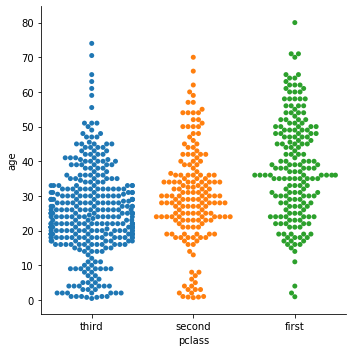

In [50]:
sns.catplot(x='pclass', y='age', data=titanic, kind='swarm')

In [51]:
# Value counts sorts based on value, not index.
titanic['pclass'].value_counts(normalize=True)

third     0.551066
first     0.242424
second    0.206510
Name: pclass, dtype: float64

In [52]:
titanic.dtypes

survived        bool
pclass      category
name          object
sex         category
age          float64
dtype: object

In [53]:
# titanic.apply(lambda x: x + 1)
titanic.select_dtypes('number').apply(lambda x: x + 1)

,age
passengerid,
1,23.0
2,39.0
3,27.0
4,36.0
...,...
888,20.0
889,NaN
890,27.0
891,33.0


In [54]:
titanic.describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [55]:
# 'number', 'category', 'object' ,'bool'
titanic.select_dtypes('category').describe()

,pclass,sex
count,891,891
unique,3,2
top,third,male
freq,491,577


In [56]:
# describe has an built-in way of doing this also, but it is more versatile to learn select dtype
titanic.describe(include='category')

,pclass,sex
count,891,891
unique,3,2
top,third,male
freq,491,577


# String processing

Could use lambda and the normal python string functions.

In [57]:
'First Last'.lower()

'first last'

In [58]:
titanic['name'].apply(lambda x: x.lower())

passengerid
1                                braund, mr. owen harris
2      cumings, mrs. john bradley (florence briggs th...
3                                 heikkinen, miss. laina
4           futrelle, mrs. jacques heath (lily may peel)
                             ...                        
888                         graham, miss. margaret edith
889             johnston, miss. catherine helen "carrie"
890                                behr, mr. karl howell
891                                  dooley, mr. patrick
Name: name, Length: 891, dtype: object

Pandas has built in accessor method for many string methods so that we don't have to use lambda.

In [59]:
titanic['name'].str.lower()

passengerid
1                                braund, mr. owen harris
2      cumings, mrs. john bradley (florence briggs th...
3                                 heikkinen, miss. laina
4           futrelle, mrs. jacques heath (lily may peel)
                             ...                        
888                         graham, miss. margaret edith
889             johnston, miss. catherine helen "carrie"
890                                behr, mr. karl howell
891                                  dooley, mr. patrick
Name: name, Length: 891, dtype: object

Note that these work on Series, not dataframes. So either use on one series at a time or a dataframe with a lmabda experssion.

In [60]:
titanic

,survived,pclass,name,sex,age
passengerid,,,,,
1,False,third,"Braund, Mr. Owen Harris",male,22.0
2,True,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,True,third,"Heikkinen, Miss. Laina",female,26.0
4,True,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
...,...,...,...,...,...
888,True,first,"Graham, Miss. Margaret Edith",female,19.0
889,False,third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
890,True,first,"Behr, Mr. Karl Howell",male,26.0
891,False,third,"Dooley, Mr. Patrick",male,32.0


## What are the longest lastnames

In [61]:
titanic['name'].str.split(',')

passengerid
1                             [Braund,  Mr. Owen Harris]
2      [Cumings,  Mrs. John Bradley (Florence Briggs ...
3                              [Heikkinen,  Miss. Laina]
4        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
                             ...                        
888                      [Graham,  Miss. Margaret Edith]
889          [Johnston,  Miss. Catherine Helen "Carrie"]
890                             [Behr,  Mr. Karl Howell]
891                               [Dooley,  Mr. Patrick]
Name: name, Length: 891, dtype: object

In [62]:
titanic['name'].str.split(',', expand=True)

,0,1
passengerid,,
1,Braund,Mr. Owen Harris
2,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,Heikkinen,Miss. Laina
4,Futrelle,Mrs. Jacques Heath (Lily May Peel)
...,...,...
888,Graham,Miss. Margaret Edith
889,Johnston,"Miss. Catherine Helen ""Carrie"""
890,Behr,Mr. Karl Howell
891,Dooley,Mr. Patrick


Can be assigned to multiple columns, or select one column with indexing.

In [63]:
titanic[['lastname', 'firstname']] = titanic['name'].str.split(',', expand=True)
titanic

,survived,pclass,name,sex,age,lastname,firstname
passengerid,,,,,,,
1,False,third,"Braund, Mr. Owen Harris",male,22.0,Braund,Mr. Owen Harris
2,True,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,True,third,"Heikkinen, Miss. Laina",female,26.0,Heikkinen,Miss. Laina
4,True,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Futrelle,Mrs. Jacques Heath (Lily May Peel)
...,...,...,...,...,...,...,...
888,True,first,"Graham, Miss. Margaret Edith",female,19.0,Graham,Miss. Margaret Edith
889,False,third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,Johnston,"Miss. Catherine Helen ""Carrie"""
890,True,first,"Behr, Mr. Karl Howell",male,26.0,Behr,Mr. Karl Howell
891,False,third,"Dooley, Mr. Patrick",male,32.0,Dooley,Mr. Patrick


In [64]:
titanic['lastname_length'] = titanic['lastname'].str.len()
titanic

,survived,pclass,name,sex,age,lastname,firstname,lastname_length
passengerid,,,,,,,,
1,False,third,"Braund, Mr. Owen Harris",male,22.0,Braund,Mr. Owen Harris,6
2,True,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Cumings,Mrs. John Bradley (Florence Briggs Thayer),7
3,True,third,"Heikkinen, Miss. Laina",female,26.0,Heikkinen,Miss. Laina,9
4,True,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Futrelle,Mrs. Jacques Heath (Lily May Peel),8
...,...,...,...,...,...,...,...,...
888,True,first,"Graham, Miss. Margaret Edith",female,19.0,Graham,Miss. Margaret Edith,6
889,False,third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,Johnston,"Miss. Catherine Helen ""Carrie""",8
890,True,first,"Behr, Mr. Karl Howell",male,26.0,Behr,Mr. Karl Howell,4
891,False,third,"Dooley, Mr. Patrick",male,32.0,Dooley,Mr. Patrick,6


In [65]:
titanic.sort_values('lastname_length', ascending=False).head()

,survived,pclass,name,sex,age,lastname,firstname,lastname_length
passengerid,,,,,,,,
431,True,first,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,Bjornstrom-Steffansson,Mr. Mauritz Hakan,22
445,True,third,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,Johannesen-Bratthammer,Mr. Bernt,22
506,False,first,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,Penasco y Castellana,Mr. Victor de Satode,20
308,True,first,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,Penasco y Castellana,Mrs. Victor de Satode (Maria Josefa Perez de ...,20
352,False,first,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,Williams-Lambert,Mr. Fletcher Fellows,16


In [66]:
# Shortcut for sorting
titanic.nlargest(5, 'lastname_length')

,survived,pclass,name,sex,age,lastname,firstname,lastname_length
passengerid,,,,,,,,
431,True,first,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,Bjornstrom-Steffansson,Mr. Mauritz Hakan,22
445,True,third,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,Johannesen-Bratthammer,Mr. Bernt,22
308,True,first,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,Penasco y Castellana,Mrs. Victor de Satode (Maria Josefa Perez de ...,20
506,False,first,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,Penasco y Castellana,Mr. Victor de Satode,20
352,False,first,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,Williams-Lambert,Mr. Fletcher Fellows,16


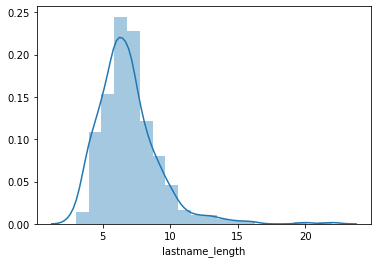

In [67]:
sns.distplot(titanic['lastname_length'], bins=20)

How many times are lastnames duplicated.

In [68]:
titanic['lastname'].value_counts().value_counts()

1    534
2     83
3     28
4     14
6      5
9      1
7      1
5      1
Name: lastname, dtype: int64

How can we view the duplicated ones.

In [69]:
titanic[titanic.duplicated('lastname', keep=False)].sort_values(['lastname'])

,survived,pclass,name,sex,age,lastname,firstname,lastname_length
passengerid,,,,,,,,
280,True,third,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,Abbott,Mrs. Stanton (Rosa Hunt),6
747,False,third,"Abbott, Mr. Rossmore Edward",male,16.0,Abbott,Mr. Rossmore Edward,6
875,True,second,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,Abelson,Mrs. Samuel (Hannah Wizosky),7
309,False,second,"Abelson, Mr. Samuel",male,30.0,Abelson,Mr. Samuel,7
...,...,...,...,...,...,...,...,...
831,True,third,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,Yasbeck,Mrs. Antoni (Selini Alexander),7
621,False,third,"Yasbeck, Mr. Antoni",male,27.0,Yasbeck,Mr. Antoni,7
112,False,third,"Zabour, Miss. Hileni",female,14.5,Zabour,Miss. Hileni,6
241,False,third,"Zabour, Miss. Thamine",female,NaN,Zabour,Miss. Thamine,6


Duplication is often due to women being registered under their husbands name. 

We can get an idea, by checking how many vaues include a parenthesis.

In [70]:
titanic.loc[titanic['name'].str.contains('\('), 'sex'].value_counts()

female    129
male       14
Name: sex, dtype: int64

In [71]:
titanic.loc[titanic['name'].str.contains('\('), 'sex'].value_counts(normalize=True)

female    0.902098
male      0.097902
Name: sex, dtype: float64

How to negate a boolean expression.

In [72]:
titanic.loc[~titanic['name'].str.contains('\('), 'sex'].value_counts()

male      563
female    185
Name: sex, dtype: int64

There seems to be several reasons for parenthesis in the name. The ones we want to change are the ones who have 'Mrs' and a parenthesis in the name.

In [73]:
# It is beneficial to break long method or indexeing chains in to several rows surrounded by parenthesis.
(titanic
    .loc[(titanic['name'].str.contains('\('))
        & (titanic['name'].str.contains('Mrs'))
        , 'sex']
    .value_counts()
)

female    125
male        0
Name: sex, dtype: int64

Dropped all male and 4 female passengers. Which females were dropped?

In [74]:
(titanic
    .loc[(titanic['name'].str.contains('\('))
        & (~titanic['name'].str.contains('Mrs'))
        & (titanic['sex'] == 'female')
        , 'name']
)

passengerid
382                          Nakid, Miss. Maria ("Mary")
565                       Meanwell, Miss. (Marion Ogden)
760    Rothes, the Countess. of (Lucy Noel Martha Dye...
797                          Leader, Dr. Alice (Farnham)
Name: name, dtype: object

Even more precisely, we only want to keep the ones with a last and first name in the parentheiss. We can use the fact that these seems to be separated by a space.

In [75]:
# Explain regex above
# titanic.loc[(titanic['name'].str.contains('\(')) & (titanic['sex'] == 'female'), 'sex'].value_counts()
titanic.loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'sex'].value_counts()

female    111
male        0
Name: sex, dtype: int64

From these passengers, we can extract the name in the parenthesis.

In [76]:
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
    .str.partition('(')[2]
)

passengerid
2         Florence Briggs Thayer)
4                  Lily May Peel)
9      Elisabeth Vilhelmina Berg)
10                   Adele Achem)
                  ...            
875               Hannah Wizosky)
880         Lily Alexenia Wilson)
881         Imanita Parrish Hall)
886              Margaret Norton)
Name: 2, Length: 111, dtype: object

In [77]:
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
    .str.partition('(')[2]
    .str.partition(')')[0]
)

passengerid
2         Florence Briggs Thayer
4                  Lily May Peel
9      Elisabeth Vilhelmina Berg
10                   Adele Achem
                 ...            
875               Hannah Wizosky
880         Lily Alexenia Wilson
881         Imanita Parrish Hall
886              Margaret Norton
Name: 0, Length: 111, dtype: object

In this case I could also have used string indexing to strip the last character, but this would give us issues if there are spaces at the end.

In [78]:
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
    .str.partition('(')[2]
    .str[:-1]
)

passengerid
2         Florence Briggs Thayer
4                  Lily May Peel
9      Elisabeth Vilhelmina Berg
10                   Adele Achem
                 ...            
875               Hannah Wizosky
880         Lily Alexenia Wilson
881         Imanita Parrish Hall
886              Margaret Norton
Name: 2, Length: 111, dtype: object

There is a more advanced way of getting this with regex directly, using a matching group to find anything in the parenthesis.

In [79]:
# %%timeit
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
    .str.extract("\((.+)\)")
)

,0
passengerid,
2,Florence Briggs Thayer
4,Lily May Peel
9,Elisabeth Vilhelmina Berg
10,Adele Achem
...,...
875,Hannah Wizosky
880,Lily Alexenia Wilson
881,Imanita Parrish Hall
886,Margaret Norton


The two way partition method is just fine, and regex can feel a bit magical sometime, but it is good to know about if you end up working a lot with strings or need to extract complicated patterns.

Now lets get just the last names from this column and assign them back to the dataframe.

In [80]:
(titanic
    .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
    .str.partition('(')[2]
    .str.partition(')')[0]
    .str.rsplit(n=1, expand=True)
)

,0,1
passengerid,,
2,Florence Briggs,Thayer
4,Lily May,Peel
9,Elisabeth Vilhelmina,Berg
10,Adele,Achem
...,...,...
875,Hannah,Wizosky
880,Lily Alexenia,Wilson
881,Imanita Parrish,Hall
886,Margaret,Norton


All the lastnames without parenthsis will remain the same.

In [81]:
titanic['real_last'] = titanic['lastname']

Overwrite only the relevant columns.

In [82]:
titanic.loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'real_last'] = (
    titanic
        .loc[titanic['name'].str.contains('Mrs.*\(.* .*\)'), 'name']
        .str.partition('(')[2]
        .str.partition(')')[0]
        .str.rsplit(n=1, expand=True)
        [1]
)

In [83]:
titanic

,survived,pclass,name,sex,age,lastname,firstname,lastname_length,real_last
passengerid,,,,,,,,,
1,False,third,"Braund, Mr. Owen Harris",male,22.0,Braund,Mr. Owen Harris,6,Braund
2,True,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Cumings,Mrs. John Bradley (Florence Briggs Thayer),7,Thayer
3,True,third,"Heikkinen, Miss. Laina",female,26.0,Heikkinen,Miss. Laina,9,Heikkinen
4,True,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Futrelle,Mrs. Jacques Heath (Lily May Peel),8,Peel
...,...,...,...,...,...,...,...,...,...
888,True,first,"Graham, Miss. Margaret Edith",female,19.0,Graham,Miss. Margaret Edith,6,Graham
889,False,third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,Johnston,"Miss. Catherine Helen ""Carrie""",8,Johnston
890,True,first,"Behr, Mr. Karl Howell",male,26.0,Behr,Mr. Karl Howell,4,Behr
891,False,third,"Dooley, Mr. Patrick",male,32.0,Dooley,Mr. Patrick,6,Dooley


In [84]:
titanic['lastname'].value_counts().value_counts()

1    534
2     83
3     28
4     14
6      5
9      1
7      1
5      1
Name: lastname, dtype: int64

In [85]:
titanic['real_last'].value_counts().value_counts()

1    598
2     70
3     23
4     11
5      5
8      1
7      1
Name: real_last, dtype: int64

## Extras